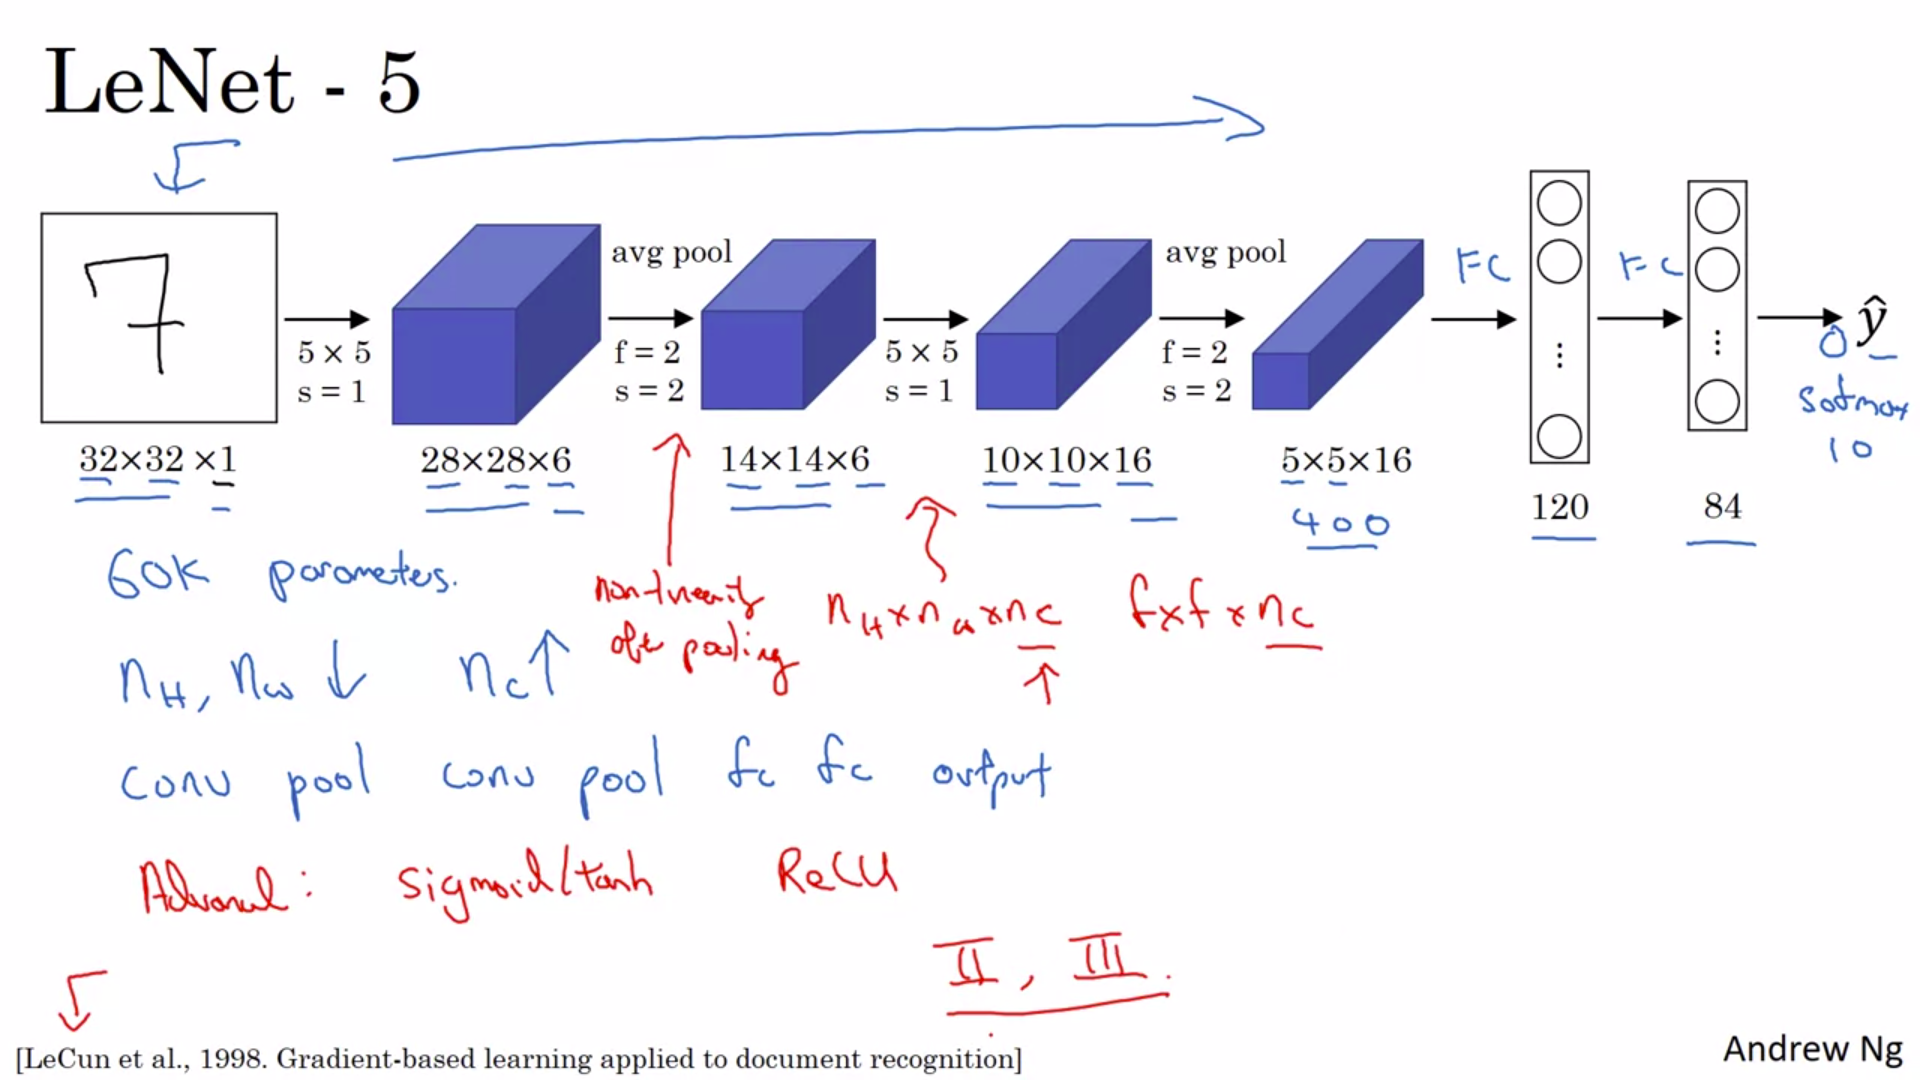

https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [3]:
VAL_SIZE = 0.3

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test  = x_test  / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
lenet_5 = keras.models.Sequential([
    Conv2D(6, 5, strides=1, activation='tanh', input_shape=x_train[0].shape, padding='same'),
    AveragePooling2D(),
    Conv2D(16, 5, strides=1, activation='tanh', padding='valid'),
    AveragePooling2D(),
    Conv2D(120, 5, strides=1, activation='tanh', padding='valid'),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

2022-07-15 21:40:19.445586: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-15 21:40:19.448302: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-15 21:40:19.456355: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
lenet_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
lenet_5.fit(x_train, y_train, epochs=10, validation_split=0.3, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

Epoch 1/10
1313/1313 [==============================] - 116s 88ms/step - loss: 0.2005 - accuracy: 0.9263 - val_loss: 0.3102 - val_accuracy: 0.8911
Epoch 2/10
1313/1313 [==============================] - 105s 80ms/step - loss: 0.1914 - accuracy: 0.9292 - val_loss: 0.3076 - val_accuracy: 0.8911
Epoch 3/10
1313/1313 [==============================] - 96s 73ms/step - loss: 0.1788 - accuracy: 0.9341 - val_loss: 0.3046 - val_accuracy: 0.8941
Epoch 4/10
1313/1313 [==============================] - 112s 85ms/step - loss: 0.1684 - accuracy: 0.9380 - val_loss: 0.3125 - val_accuracy: 0.8922
Epoch 5/10
1313/1313 [==============================] - 92s 70ms/step - loss: 0.1591 - accuracy: 0.9414 - val_loss: 0.3066 - val_accuracy: 0.8965
Epoch 6/10
1313/1313 [==============================] - 109s 83ms/step - loss: 0.1501 - accuracy: 0.9451 - val_loss: 0.3116 - val_accuracy: 0.8934
Epoch 7/10
1313/1313 [==============================] - 109s 83ms/step - loss: 0.1403 - accuracy: 0.9480 - val_loss: 0.3

In [10]:
lenet_5.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3560 - accuracy: 0.8867


[0.35602498054504395, 0.8866999745368958]